In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from scipy.stats import mode

In [16]:
data = pd.read_csv('berkshire_hathaway_data.csv')

X = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values
y30 = data['Thirty Out'].values
close_prices = data['Close'].values
y = (y30 > close_prices).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=325)

# Initialize classification models
log_reg_model = LogisticRegression(max_iter=1000, random_state=325)
rf_clf_model = RandomForestClassifier(n_estimators=100, random_state=325)
knn_clf_model = KNeighborsClassifier(n_neighbors=5)

# Train models
log_reg_model.fit(X_train, y_train)
rf_clf_model.fit(X_train, y_train)
knn_clf_model.fit(X_train, y_train)

# Model predictions
y_pred_log = log_reg_model.predict(X_test)
y_pred_rf = rf_clf_model.predict(X_test)
y_pred_knn = knn_clf_model.predict(X_test)

# Ensemble predictions (majority voting)
ensemble_predictions = np.array([y_pred_log, y_pred_rf, y_pred_knn])
y_ensemble = mode(ensemble_predictions, axis=0, keepdims=True).mode[0]

/home/brandon/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Logistic Regression Accuracy: 0.5882352941176471
Random Forest Accuracy: 0.6995798319327731
K-Nearest Neighbors Accuracy: 0.5399159663865546
Ensemble Accuracy: 0.6260504201680672

Classification Report for Ensemble Model:
               precision    recall  f1-score   support

           0       0.66      0.19      0.29       196
           1       0.62      0.93      0.75       280

    accuracy                           0.63       476
   macro avg       0.64      0.56      0.52       476
weighted avg       0.64      0.63      0.56       476



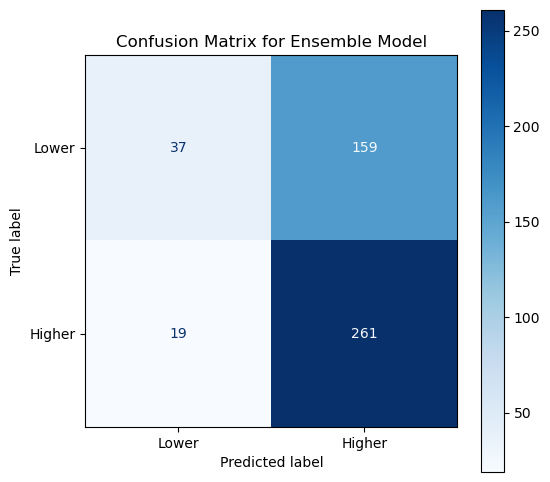

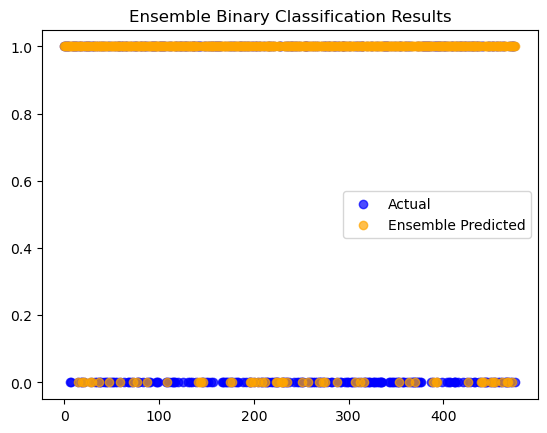

In [17]:
# Evaluate the individual models and the ensemble
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Ensemble Accuracy:", accuracy_score(y_test, y_ensemble))

print("\nClassification Report for Ensemble Model:\n", classification_report(y_test, y_ensemble))

# Confusion Matrix
cm = confusion_matrix(y_test, y_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Lower", "Higher"])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix for Ensemble Model")
plt.show()

x_axis = np.linspace(0, len(y_test), len(y_test))
plt.scatter(x_axis, y_test, label='Actual', alpha=0.7, color='blue')
plt.scatter(x_axis, y_ensemble, label='Ensemble Predicted', alpha=0.7, color='orange')
plt.legend()
plt.title('Ensemble Binary Classification Results')
plt.show()